# Experiments with Keras functional API on MNIST

This notebook will guide you through the use of the `keras` functional API. You are going to use the `mnist` dataset from LeCun et al. 1998

We assume you are using TF 2. If you need to install some packages, use `pip install ...`, e.g. `pip install sklearn` for SciKit Learn.

## Loading the packages

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

2024-05-23 10:51:35.828439: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


OK: TensorFlow >= 2.0.0.


In [2]:
import numpy as np
from matplotlib import pyplot as pl

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import utils
from sklearn import metrics as me

## Loading the raw data
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [4]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## MLP
Here is an example of Multi-Layer Perceptron first defined with the Sequential model then with the functional model. We will also need to tell Keras what is the size of our inputs, in our case a linearized vector of size D=784.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None,

2024-05-23 10:51:45.750320: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


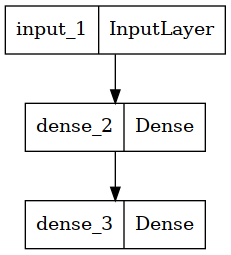

In [5]:
from tensorflow.keras.utils import plot_model
H = 300               # number of neurons
D = X_train.shape[1]  # dimension of input - 784 for MNIST

#Keras sequential model
model1 = Sequential()
model1.add(Dense(H, input_shape=(D,), activation='relu'))
model1.add(Dense(n_classes, activation='softmax'))
model1.summary()

#Keras functional API
visible = Input(shape=(D,)) # func api, input is declared
hidden1 = Dense(H, activation='relu')(visible)
output = Dense(n_classes, activation='softmax')(hidden1)
model2 = Model(inputs=visible, outputs=output)
model2.summary()
plot_model(model2, to_file='multilayer_perceptron_graph.png')

In [6]:
B = 128
E = 10
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
log = model2.fit(X_train, Y_train, batch_size=B, epochs=E,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 13s 24ms/step - loss: 0.2880 - accuracy: 0.9186 - val_loss: 0.1542 - val_accuracy: 0.9555
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 0.1244 - accuracy: 0.9637 - val_loss: 0.0989 - val_accuracy: 0.9713
Epoch 3/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0841 - accuracy: 0.9751 - val_loss: 0.0828 - val_accuracy: 0.9753
Epoch 4/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0624 - accuracy: 0.9819 - val_loss: 0.0726 - val_accuracy: 0.9757
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0474 - accuracy: 0.9862 - val_loss: 0.0701 - val_accuracy: 0.9777
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0380 - accuracy: 0.9890 - val_loss: 0.0682 - val_accuracy: 0.9788
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0301 - accuracy: 0.9913 - val_loss: 0.0663 - val_accuracy:

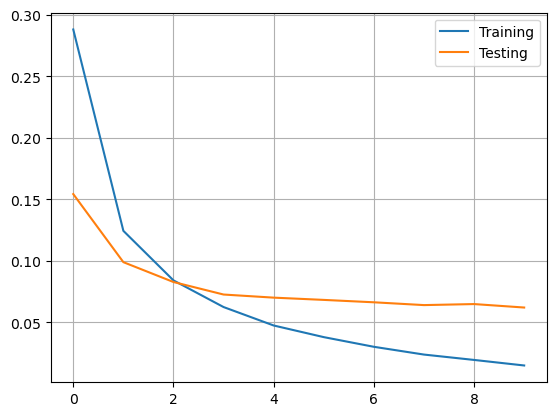

In [7]:
pl.plot(log.history['loss'], label='Training')
pl.plot(log.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

In [8]:
loss_test, metric_test = model2.evaluate(X_test, Y_test)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.0620 - accuracy: 0.9818
Test loss: 0.06204365938901901
Test accuracy: 0.9818000197410583


## Convolutional neural network - CNN

In [9]:
# re-shape the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0   

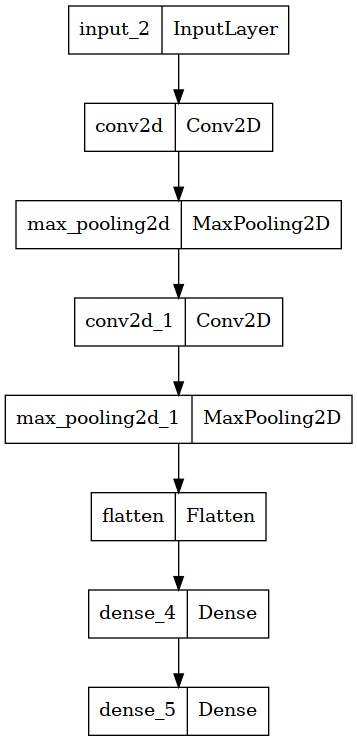

In [10]:
# CNN - Keras functional API
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

visible = Input(shape=(28,28,1))
conv1 = Conv2D(32, kernel_size=3, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(32, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(100, activation='relu')(flat)
output = Dense(10, activation='softmax')(hidden1)
model3 = Model(inputs=visible, outputs=output)
# summarize layers
print(model3.summary())
# plot graph
plot_model(model3, to_file='convolutional_neural_network.png')

In [11]:
B = 128
E = 10
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
log = model3.fit(X_train, Y_train, batch_size=B, epochs=E,
                 verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 35s 74ms/step - loss: 0.2472 - accuracy: 0.9244 - val_loss: 0.0729 - val_accuracy: 0.9778
Epoch 2/10
469/469 [==============================] - 32s 69ms/step - loss: 0.0648 - accuracy: 0.9799 - val_loss: 0.0436 - val_accuracy: 0.9860
Epoch 3/10
469/469 [==============================] - 31s 66ms/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0386 - val_accuracy: 0.9864
Epoch 4/10
469/469 [==============================] - 36s 77ms/step - loss: 0.0335 - accuracy: 0.9896 - val_loss: 0.0340 - val_accuracy: 0.9884
Epoch 5/10
469/469 [==============================] - 40s 84ms/step - loss: 0.0258 - accuracy: 0.9914 - val_loss: 0.0314 - val_accuracy: 0.9898
Epoch 6/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0210 - accuracy: 0.9935 - val_loss: 0.0290 - val_accuracy: 0.9907
Epoch 7/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0313 - val_accuracy:

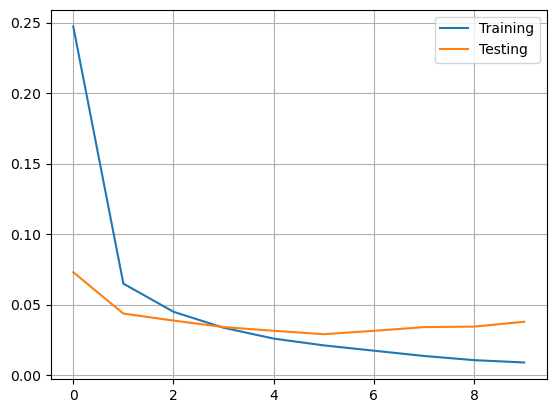

In [12]:
pl.plot(log.history['loss'], label='Training')
pl.plot(log.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

In [13]:
loss_test, metric_test = model3.evaluate(X_test, Y_test)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.0378 - accuracy: 0.9888
Test loss: 0.037792451679706573
Test accuracy: 0.9887999892234802


## Convolutional neural network - CNN with multiple path and shared input layer

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 26, 26, 32)   320         ['input_3[0][0]']                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 23, 23, 32)   1184        ['input_3[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 26, 26, 32)   0           ['conv2d_2[0][0]']               
                                                                                            

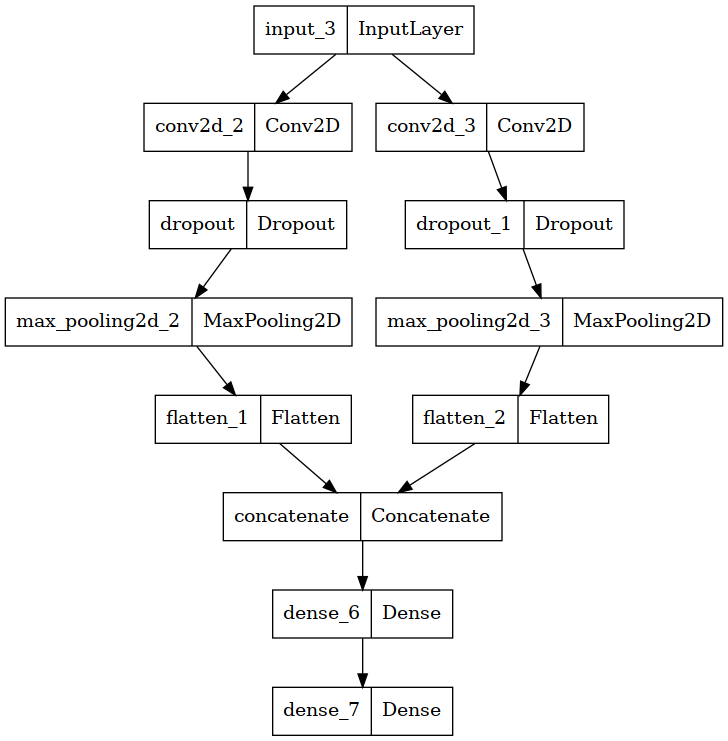

In [14]:
# Shared Input Layer
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, concatenate

# input layer
visible = Input(shape=(28,28,1))
# first feature extractor
conv1 = Conv2D(32, kernel_size=3, activation='relu')(visible)
drop1 = Dropout(0.2)(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(drop1)
flat1 = Flatten()(pool1)
# second feature extractor
conv2 = Conv2D(32, kernel_size=6, activation='relu')(visible)
drop2 = Dropout(0.2)(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(drop2)
flat2 = Flatten()(pool2)
# merge feature extractors
merge = concatenate([flat1, flat2])
# interpretation layer
hidden1 = Dense(100, activation='relu')(merge)
# prediction output
output = Dense(10, activation='softmax')(hidden1)
model4 = Model(inputs=visible, outputs=output)
# summarize layers
print(model4.summary())
# plot graph
plot_model(model4, to_file='shared_input_layer.png')

In [15]:
B = 128
E = 10
model4.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
log = model4.fit(X_train, Y_train, batch_size=B, epochs=E,
                 verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 60s 126ms/step - loss: 0.1760 - accuracy: 0.9468 - val_loss: 0.0631 - val_accuracy: 0.9818
Epoch 2/10
469/469 [==============================] - 54s 115ms/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0511 - val_accuracy: 0.9837
Epoch 3/10
469/469 [==============================] - 53s 114ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0362 - val_accuracy: 0.9878
Epoch 4/10
469/469 [==============================] - 52s 111ms/step - loss: 0.0253 - accuracy: 0.9924 - val_loss: 0.0491 - val_accuracy: 0.9833
Epoch 5/10
469/469 [==============================] - 52s 110ms/step - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.0332 - val_accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 68s 144ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0319 - val_accuracy: 0.9898
Epoch 7/10
469/469 [==============================] - 69s 148ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0359 - val_ac

In [16]:
loss_test, metric_test = model4.evaluate(X_test, Y_test)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.0352 - accuracy: 0.9893
Test loss: 0.03523772582411766
Test accuracy: 0.989300012588501


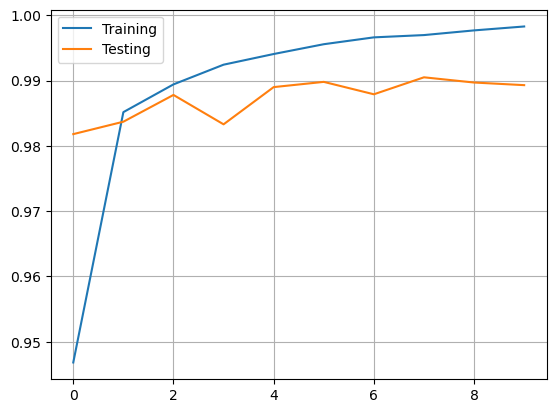

In [17]:
pl.plot(log.history['accuracy'], label='Training')
pl.plot(log.history['val_accuracy'], label='Testing')
pl.legend()
pl.grid()

## Conv neural network - CNN with multiple path, multiple features

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 26, 26, 32)   320         ['input_4[0][0]']                
                                                                                                  
 dropout_2 (Dropout)            (None, 26, 26, 32)   0           ['conv2d_4[0][0]']               
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 13, 13, 32)  0           ['dropout_2[0][0]']              
                                                                                            

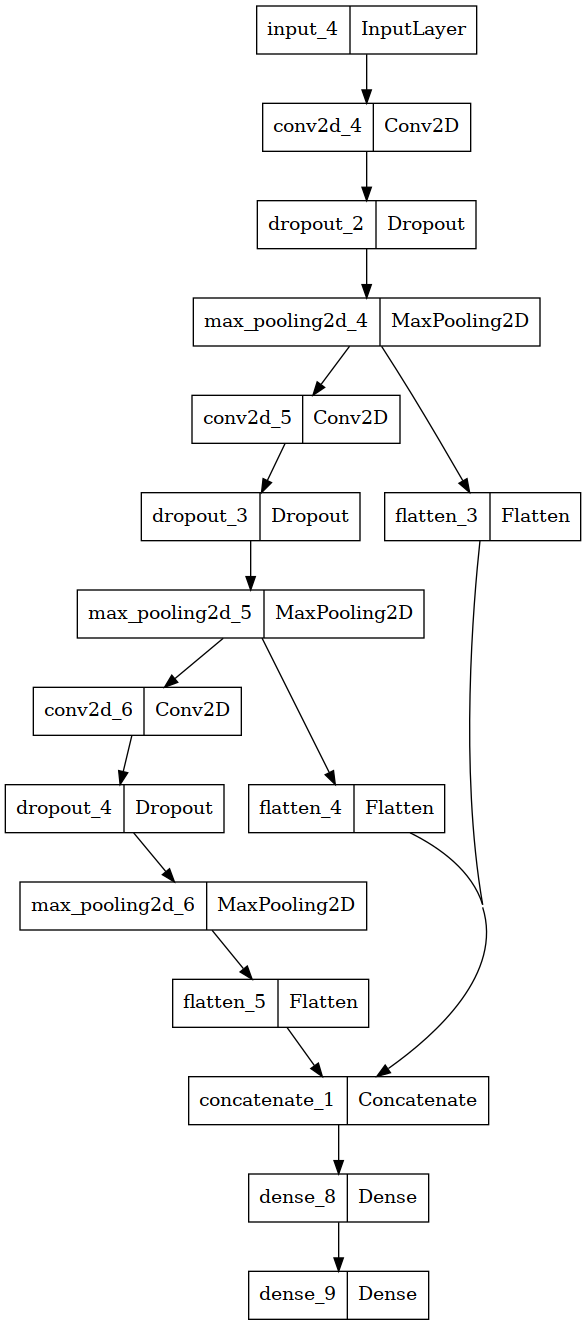

In [18]:
# Shared Input Layer

# input layer
visible = Input(shape=(28,28,1))
# first feature extractor
conv1 = Conv2D(32, kernel_size=3, activation='relu')(visible)
drop1 = Dropout(0.2)(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(drop1)
flat1 = Flatten()(pool1)
# second feature extractor
conv2 = Conv2D(32, kernel_size=3, activation='relu')(pool1)
drop2 = Dropout(0.2)(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(drop2)
flat2 = Flatten()(pool2)
# third feature extractor
conv3 = Conv2D(32, kernel_size=3, activation='relu')(pool2)
drop3 = Dropout(0.2)(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(drop3)
flat3 = Flatten()(pool3)
# merge feature extractors
merge = concatenate([flat1, flat2, flat3])
# interpretation layer
hidden1 = Dense(100, activation='relu')(merge)
# prediction output
output = Dense(10, activation='softmax')(hidden1)
model5 = Model(inputs=visible, outputs=output)
# summarize layers
print(model5.summary())
# plot graph
plot_model(model5, to_file='shared_input_layer_multi_feat.png')

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

B = 128
E = 10
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', verbose=1, 
                             monitor='val_accuracy',save_best_only=True, 
                             mode='auto')
model5.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
log = model5.fit(X_train, Y_train, batch_size=B, epochs=E,
                 verbose=1, validation_data=(X_test, Y_test), 
                 callbacks=[checkpoint])

Epoch 1/10
469/469 [==============================] - ETA: 0s - loss: 0.1923 - accuracy: 0.9416
Epoch 1: val_accuracy improved from -inf to 0.98020, saving model to model-001.h5
469/469 [==============================] - 73s 154ms/step - loss: 0.1923 - accuracy: 0.9416 - val_loss: 0.0703 - val_accuracy: 0.9802
Epoch 2/10
469/469 [==============================] - ETA: 0s - loss: 0.0535 - accuracy: 0.9836
Epoch 2: val_accuracy improved from 0.98020 to 0.98720, saving model to model-002.h5
469/469 [==============================] - 92s 196ms/step - loss: 0.0535 - accuracy: 0.9836 - val_loss: 0.0452 - val_accuracy: 0.9872
Epoch 3/10
469/469 [==============================] - ETA: 0s - loss: 0.0364 - accuracy: 0.9885
Epoch 3: val_accuracy improved from 0.98720 to 0.98860, saving model to model-003.h5
469/469 [==============================] - 84s 179ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0359 - val_accuracy: 0.9886
Epoch 4/10
469/469 [==============================] - ETA:

In [22]:
model5.load_weights(filepath = 'model-004.h5')
loss_test, metric_test = model5.evaluate(X_test, Y_test)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 8s 26ms/step - loss: 0.0293 - accuracy: 0.9906
Test loss: 0.029250839725136757
Test accuracy: 0.9905999898910522


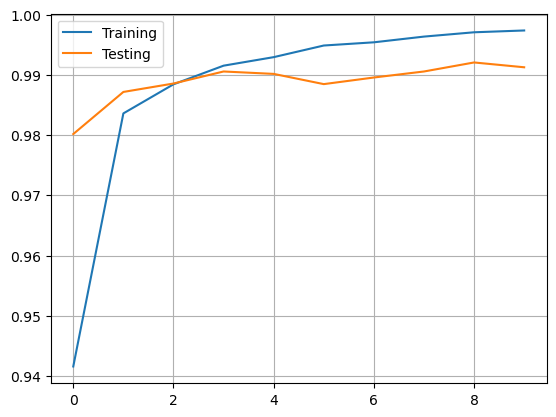

In [23]:
pl.plot(log.history['accuracy'], label='Training')
pl.plot(log.history['val_accuracy'], label='Testing')
pl.legend()
pl.grid()